## 1. Importing Libraries and Fixed Random Seed



In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
import os
import re
import tensorflow as tf
import warnings
from tensorflow.keras import models, layers


# Ignore warings
warnings.filterwarnings("ignore", category=UserWarning)

# Config retina
%config InlineBackend.figure_format = 'retina'

# Fixing seeds
def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    tf.random.set_seed(seed)

seed_everything(44)

## 2. Importing Dataset

In [4]:
# 데이터 파일 경로 설정
train_path = 'C:/Users/82106/Desktop/데이터분석 프로젝트/소득예측/open/open/train.csv'
test_path = 'C:/Users/82106/Desktop/데이터분석 프로젝트/소득예측/open/open/test.csv'

# 데이터 파일 읽어오기
train = pd.read_csv(train_path)
test = pd.read_csv(test_path)

# 데이터 확인
display(train.head(5))
display(test.head(5))

,ID,Age,Gender,Education_Status,Employment_Status,Working_Week (Yearly),Industry_Status,Occupation_Status,Race,Hispanic_Origin,...,Citizenship,Birth_Country,Birth_Country (Father),Birth_Country (Mother),Tax_Status,Gains,Losses,Dividends,Income_Status,Income
0,TRAIN_00000,63,M,Middle (7-8),Full-Time,4,Social Services,Services,White,All other,...,Native,US,US,US,Nonfiler,0,0,0,Unknown,425
1,TRAIN_00001,37,M,Associates degree (Vocational),Full-Time,52,Entertainment,Services,White,All other,...,Native,US,US,US,Single,0,0,0,Under Median,0
2,TRAIN_00002,58,F,High graduate,Full-Time,52,Manufacturing (Non-durable),Admin Support (include Clerical),Black,All other,...,Native,US,US,US,Married Filling Jointly both under 65 (MFJ),3411,0,0,Under Median,860
3,TRAIN_00003,44,M,High graduate,Full-Time,52,Retail,Technicians & Support,White,All other,...,Native,US,US,US,Single,0,0,0,Under Median,850
4,TRAIN_00004,37,F,High graduate,Full-Time,52,Retail,Sales,White,All other,...,Native,US,US,US,Head of Household (HOH),0,0,0,Unknown,570


,ID,Age,Gender,Education_Status,Employment_Status,Working_Week (Yearly),Industry_Status,Occupation_Status,Race,Hispanic_Origin,...,Household_Summary,Citizenship,Birth_Country,Birth_Country (Father),Birth_Country (Mother),Tax_Status,Gains,Losses,Dividends,Income_Status
0,TEST_0000,79,M,High Junior,Children or Armed Forces,0,Not in universe or children,Unknown,White,All other,...,Householder,Native,US,Unknown,Unknown,Single,0,0,0,Under Median
1,TEST_0001,47,M,Elementary (5-6),Children or Armed Forces,0,Not in universe or children,Unknown,White,Other Spanish,...,Child 18 or older,Native,US,US,US,Nonfiler,0,0,0,Under Median
2,TEST_0002,18,F,High Junior,Children or Armed Forces,52,Retail,Services,White,All other,...,Child 18 or older,Native,US,US,US,Single,0,0,0,Under Median
3,TEST_0003,39,F,Associates degree (Vocational),Full-Time,30,Medical (except Hospitals),Services,White,All other,...,Spouse of householder,Native,US,US,US,Married Filling Jointly both under 65 (MFJ),0,0,0,Unknown
4,TEST_0004,6,M,Children,Children or Armed Forces,0,Not in universe or children,Unknown,White,Mexican-American,...,Child under 18 never married,Native,US,US,US,Nonfiler,0,0,0,Unknown


In [5]:
train.shape, test.shape

((20000, 23), (10000, 22))

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   ID                      20000 non-null  object
 1   Age                     20000 non-null  int64 
 2   Gender                  20000 non-null  object
 3   Education_Status        20000 non-null  object
 4   Employment_Status       20000 non-null  object
 5   Working_Week (Yearly)   20000 non-null  int64 
 6   Industry_Status         20000 non-null  object
 7   Occupation_Status       20000 non-null  object
 8   Race                    20000 non-null  object
 9   Hispanic_Origin         20000 non-null  object
 10  Martial_Status          20000 non-null  object
 11  Household_Status        20000 non-null  object
 12  Household_Summary       20000 non-null  object
 13  Citizenship             20000 non-null  object
 14  Birth_Country           20000 non-null  object
 15  Bi

다양한 특성을 가진 사람들에 대한 정보를 포함하고 있으며, 몇 가지 중요한 특성들이 있다. 여기에는 나이, 성별, 교육 수준, 고용 상태, 산업 및 직업 상태, 인종, 소득 등이 포함된다. 

또한, 데이터에는 고유 식별자(ID), 근무 주(년), 이민 및 시민권 정보, 출생 국가, 부모의 출생 국가, 세금 상태, 소득, 배당금 등에 대한 정보도 포함되어 있다

In [7]:
train.describe(include='all')

,ID,Age,Gender,Education_Status,Employment_Status,Working_Week (Yearly),Industry_Status,Occupation_Status,Race,Hispanic_Origin,...,Citizenship,Birth_Country,Birth_Country (Father),Birth_Country (Mother),Tax_Status,Gains,Losses,Dividends,Income_Status,Income
count,20000,20000.000000,20000,20000,20000,20000.000000,20000,20000,20000,20000,...,20000,20000,20000,20000,20000,20000.000000,20000.000000,20000.000000,20000,20000.000000
unique,20000,NaN,2,17,8,NaN,24,15,5,10,...,5,43,43,43,6,NaN,NaN,NaN,3,NaN
top,TRAIN_00000,NaN,F,High graduate,Children or Armed Forces,NaN,Not in universe or children,Unknown,White,All other,...,Native,US,US,US,Married Filling Jointly both under 65 (MFJ),NaN,NaN,NaN,Under Median,NaN
freq,1,NaN,10472,6494,11142,NaN,4688,4688,16845,17769,...,17825,17825,16563,16594,8588,NaN,NaN,NaN,13237,NaN
mean,NaN,35.632500,NaN,NaN,NaN,34.943050,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,383.129500,40.202150,123.451450,NaN,554.565250
std,NaN,17.994414,NaN,NaN,NaN,22.254592,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,4144.247487,279.182677,1206.949429,NaN,701.553155
min,NaN,0.000000,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,0.000000
25%,NaN,23.000000,NaN,NaN,NaN,7.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,0.000000
50%,NaN,34.000000,NaN,NaN,NaN,52.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,500.000000
75%,NaN,47.000000,NaN,NaN,NaN,52.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,875.000000


In [8]:
train.describe()

,Age,Working_Week (Yearly),Gains,Losses,Dividends,Income
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,35.632500,34.943050,383.129500,40.202150,123.451450,554.565250
std,17.994414,22.254592,4144.247487,279.182677,1206.949429,701.553155
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.000000,7.000000,0.000000,0.000000,0.000000,0.000000
50%,34.000000,52.000000,0.000000,0.000000,0.000000,500.000000
75%,47.000000,52.000000,0.000000,0.000000,0.000000,875.000000
max,90.000000,52.000000,99999.000000,4356.000000,45000.000000,9999.000000


In [10]:
train.describe(include='object')

,ID,Gender,Education_Status,Employment_Status,Industry_Status,Occupation_Status,Race,Hispanic_Origin,Martial_Status,Household_Status,Household_Summary,Citizenship,Birth_Country,Birth_Country (Father),Birth_Country (Mother),Tax_Status,Income_Status
count,20000,20000,20000,20000,20000,20000,20000,20000,20000,20000,20000,20000,20000,20000,20000,20000,20000
unique,20000,2,17,8,24,15,5,10,7,31,8,5,43,43,43,6,3
top,TRAIN_00000,F,High graduate,Children or Armed Forces,Not in universe or children,Unknown,White,All other,Married,Householder,Householder,Native,US,US,US,Married Filling Jointly both under 65 (MFJ),Under Median
freq,1,10472,6494,11142,4688,4688,16845,17769,9554,6087,8552,17825,17825,16563,16594,8588,13237


## 3. EDA (Exploratory Data Analysis)

In [11]:
train.isna().sum()

ID                        0
Age                       0
Gender                    0
Education_Status          0
Employment_Status         0
Working_Week (Yearly)     0
Industry_Status           0
Occupation_Status         0
Race                      0
Hispanic_Origin           0
Martial_Status            0
Household_Status          0
Household_Summary         0
Citizenship               0
Birth_Country             0
Birth_Country (Father)    0
Birth_Country (Mother)    0
Tax_Status                0
Gains                     0
Losses                    0
Dividends                 0
Income_Status             0
Income                    0
dtype: int64

In [12]:
train.columns

Index(['ID', 'Age', 'Gender', 'Education_Status', 'Employment_Status',
       'Working_Week (Yearly)', 'Industry_Status', 'Occupation_Status', 'Race',
       'Hispanic_Origin', 'Martial_Status', 'Household_Status',
       'Household_Summary', 'Citizenship', 'Birth_Country',
       'Birth_Country (Father)', 'Birth_Country (Mother)', 'Tax_Status',
       'Gains', 'Losses', 'Dividends', 'Income_Status', 'Income'],
      dtype='object')

In [13]:
# Remove special characters and replace spaces with underscores in column names
train.columns = train.columns.str.replace('(', '', regex=False) \
                               .str.replace(')', '', regex=False) \
                               .str.replace(' ', '_', regex=False)
test.columns = test.columns.str.replace('(', '', regex=False) \
                              .str.replace(')', '', regex=False) \
                              .str.replace(' ', '_', regex=False)

In [14]:
# Select object columns
object_cols = list(train.select_dtypes(include=['object']).columns)

# Correctly formatted regex pattern to match the special characters you listed
pattern = r'[#@&\[\]<()]'

# Remove special characters in object columns
for col in object_cols:
    train[col] = train[col].str.replace(pattern, '', regex=True)
    test[col] = test[col].str.replace(pattern, '', regex=True)

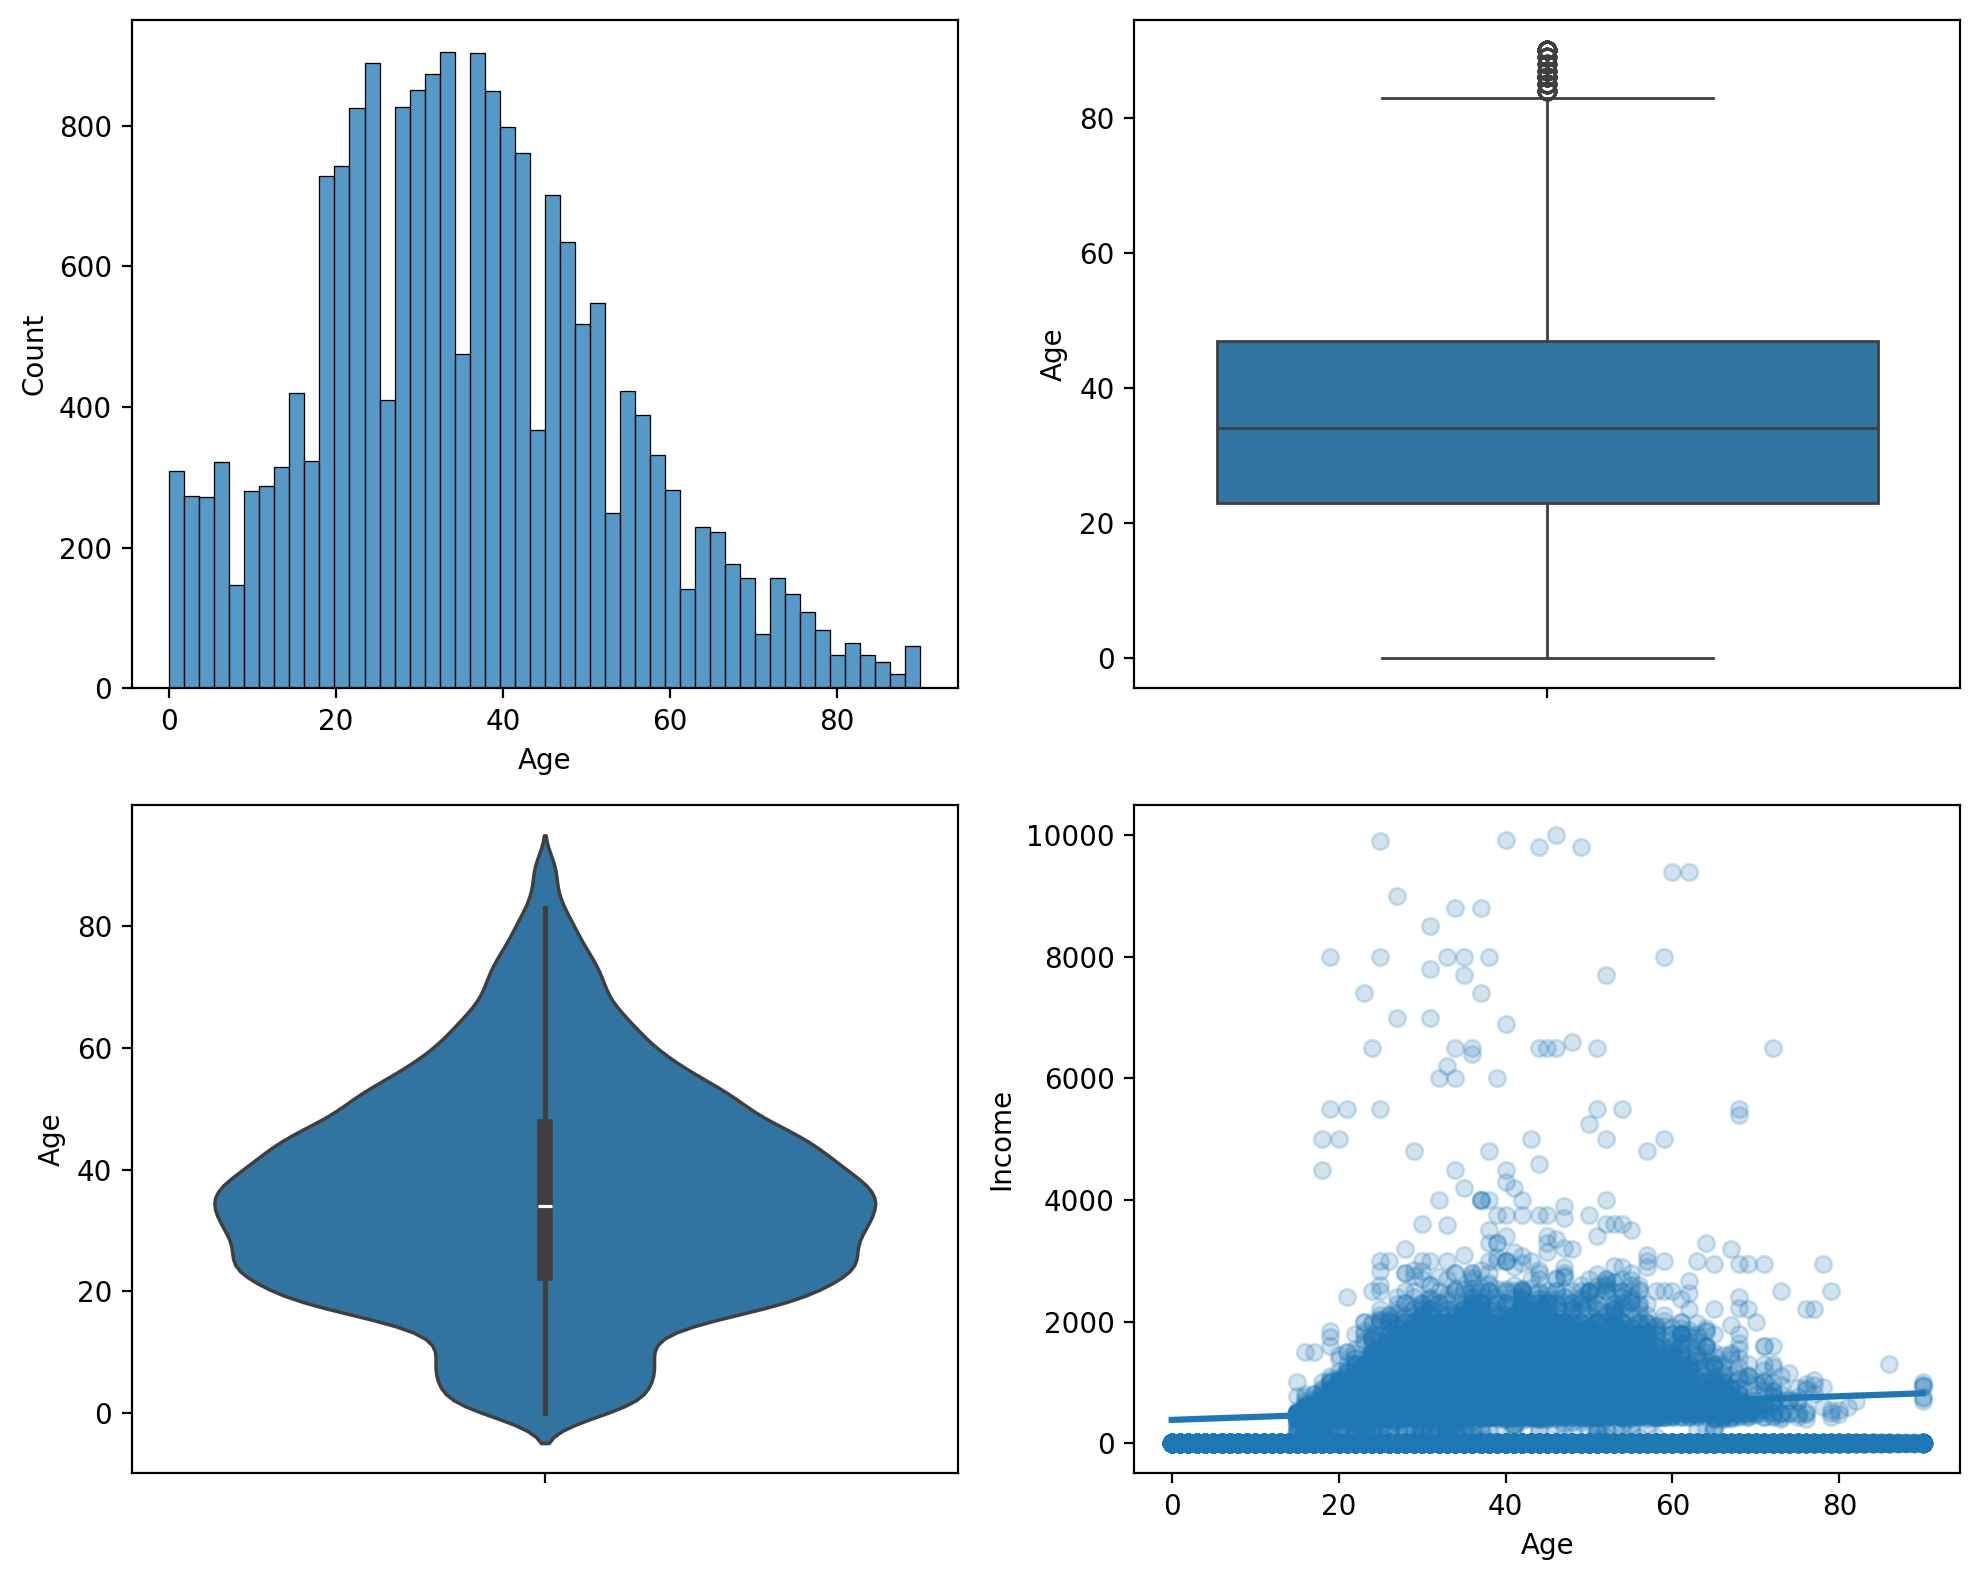

In [15]:
col = train['Age']
f, ax = plt.subplots(2, 2, figsize = (10, 8))
sns.histplot(col, bins=50, ax=ax[0][0])
sns.boxplot(col, ax=ax[0][1])
sns.violinplot(col, ax=ax[1][0])
sns.regplot(x=col, y=train['Income'], scatter_kws={'alpha':0.2}, ax=ax[1][1])
plt.tight_layout()

첫 번째 그래프 (위 왼쪽): 히스토그램으로 연령의 분포를 나타낸다. 데이터는 대체로 중앙에 집중되어 있으며, 대략 정규 분포를 따르는 것처럼 보인다. 가장 높은 빈도는 20대 중반에서 30대 초반으로 추정된다.

두 번째 그래프 (위 오른쪽): 박스 플롯으로 연령의 중앙값, 사분위수, 이상치를 나타낸다. 중앙값이 40대 초반에 위치해 있으며, 데이터는 상대적으로 고르게 분포되어 있으나, 상위 이상치가 몇 개 보인다.

세 번째 그래프 (아래 왼쪽): 바이올린 플롯으로 연령 분포의 밀도를 나타낸다. 히스토그램과 비슷한 정보를 제공하지만, 밀도를 통해 데이터의 분포가 어떻게 모여 있는지를 더욱 시각적으로 파악할 수 있다. 이 그래프 또한 중앙에 높은 밀도를 보이며, 양쪽 꼬리에서는 밀도가 낮아진다.

네 번째 그래프 (아래 오른쪽): 산점도로 연령에 따른 소득을 나타낸다. 대부분의 데이터 포인트가 낮은 소득 범위에 집중되어 있으며, 연령이 증가함에 따라 소득의 범위도 넓어지는 것을 볼 수 있다. 소득이 매우 높은 이상치가 존재함을 알 수 있지만, 대체로 소득은 연령과 뚜렷한 상관관계가 없는 것처럼 보인다.

In [16]:
train['Income'].value_counts()

Income
0       8697
500      743
700      550
600      547
800      526
        ... 
543        1
1713       1
1602       1
1722       1
2373       1
Name: count, Length: 1228, dtype: int64

In [ ]:
train.columns

Index(['ID', 'Age', 'Gender', 'Education_Status', 'Employment_Status',
       'Working_Week_Yearly', 'Industry_Status', 'Occupation_Status', 'Race',
       'Hispanic_Origin', 'Martial_Status', 'Household_Status',
       'Household_Summary', 'Citizenship', 'Birth_Country',
       'Birth_Country_Father', 'Birth_Country_Mother', 'Tax_Status', 'Gains',
       'Losses', 'Dividends', 'Income_Status', 'Income'],
      dtype='object')

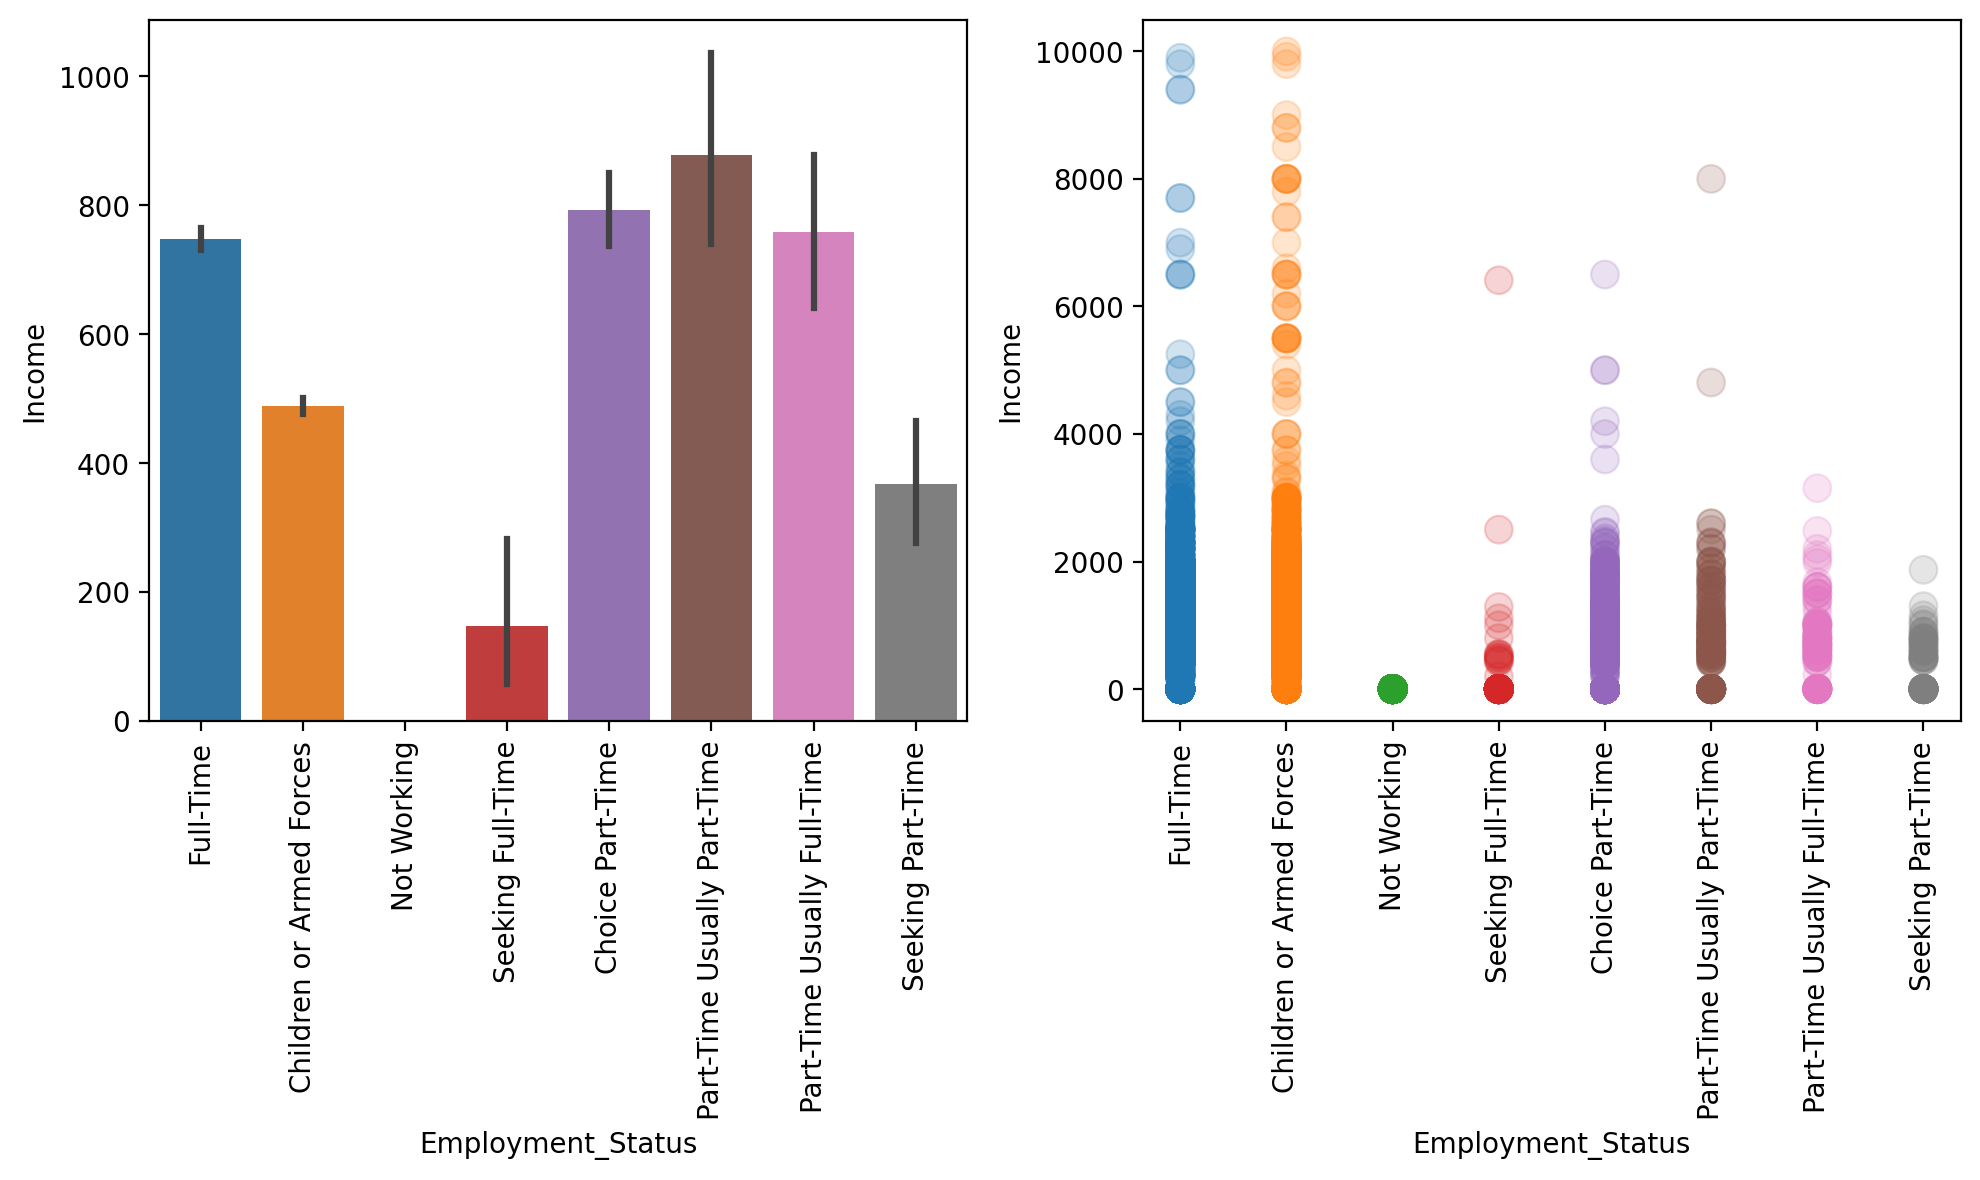

In [17]:
col = train['Employment_Status']
f, ax = plt.subplots(1, 2, figsize = (10, 6))

sns.barplot(x=col, y=train['Income'], hue=col, ax=ax[0])
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=90)

sns.scatterplot(x=col, y=train['Income'], hue=col, alpha=0.2, s= 100, edgecolor=None, ax=ax[1])
ax[1].set_xticklabels(ax[0].get_xticklabels(), rotation=90)
ax[1].legend().remove()

plt.tight_layout()

왼쪽 그래프: 이 그래프는 막대 그래프로서, 각 고용 상태에 대한 평균 소득과 표준편차를 표시한다. 각 막대의 높이는 평균 소득을, 막대 위의 검은색 선은 표준편차의 범위를 나타낸다. 여기서 'Full-time' 고용 상태의 평균 소득이 가장 높고, 'Children or Armed Forces'는 평균 소득이 가장 낮다. 'Not working'과 'Seeking Full-time' 카테고리는 특히 낮은 소득을 보이며, 'Part-time usually'과 'Part-time partly' 카테고리는 중간 정도의 소득을 보인다.

오른쪽 그래프: 이 그래프는 비즈 등고선 플롯(또는 벌집 플롯)으로, 각 고용 상태에 따른 소득의 분포를 개별 데이터 포인트로 나타낸다. 각 점의 색상과 크기는 소득의 범위를 나타낸다. 'Full-time' 카테고리에서 소득 범위가 가장 넓고, 다른 카테고리에 비해 높은 소득을 받는 사람들의 비율도 높다. 'Not working' 카테고리에서는 소득이 거의 없으며, 이는 일을 하지 않기 때문일 수 있다.

<Axes: >

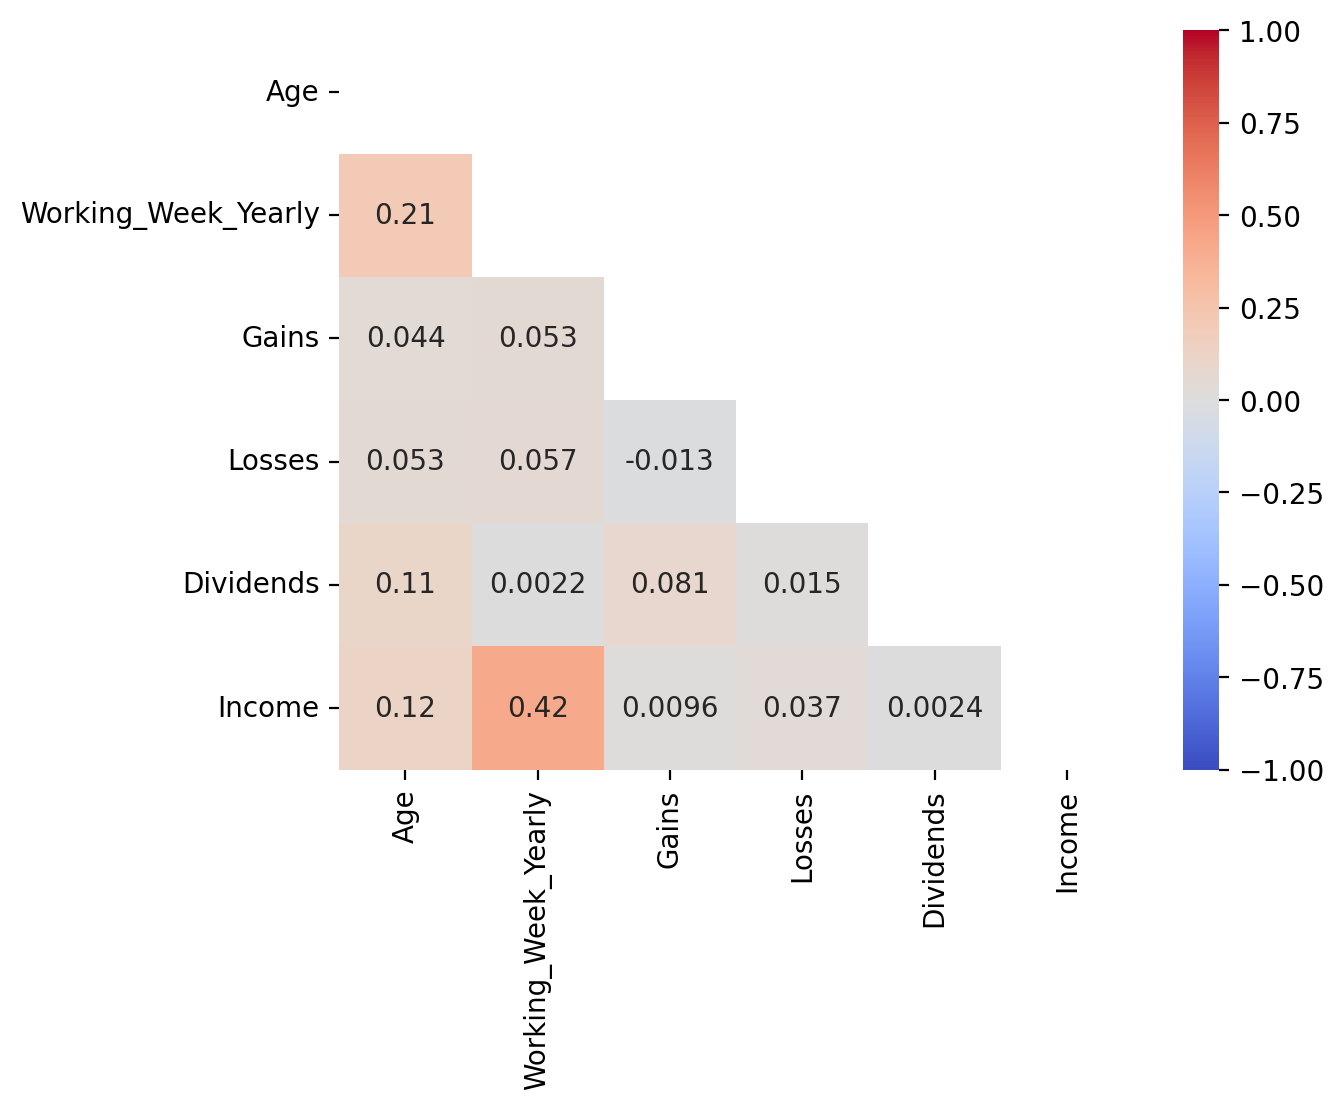

In [18]:
import numpy as np

# Select only numeric columns
numeric_cols = train.select_dtypes(include=[np.number])

corr = numeric_cols.corr()  # Compute the correlation matrix for numeric columns
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, cmap='coolwarm', annot=True, vmin=-1, vmax=1, mask=mask)

Working_Week_Yearly와 Income 간에 가장 높은 양의 상관관계(0.42)가 보이며, 이는 일하는 주의 수가 많을수록 소득이 높을 가능성을 시사한다.

Age와 Dividends는 0.11의 상관관계를 가지는데, 이는 나이가 많을수록 배당금 수익이 증가할 가능성을 나타낼 수 있다.

Age와 Income도 0.12의 양의 상관관계를 가지는데, 이는 나이가 많을수록 소득이 높아질 수 있다는 것을 암시한다.

다른 변수들은 서로 매우 낮은 상관관계를 보이며, 이는 선형적인 관계가 거의 없거나 매우 약하다는 것을 의미한다.

## 4. Outlier Handling

https://medium.com/analytics-vidhya/how-to-handle-outliers-in-machine-learning-5d8105c708e5

In [ ]:
# # drop columns outlier based 1.5 IQR of Income
# Q1 = train['Income'].quantile(0.25)
# Q3 = train['Income'].quantile(0.75)
# IQR = Q3 - Q1
# train = train[~((train['Income'] < (Q1 - 2.0 * IQR)) | (train['Income'] > (Q3 + 2.0 * IQR)))]

In [ ]:
train.shape, test.shape

((20000, 23), (10000, 22))

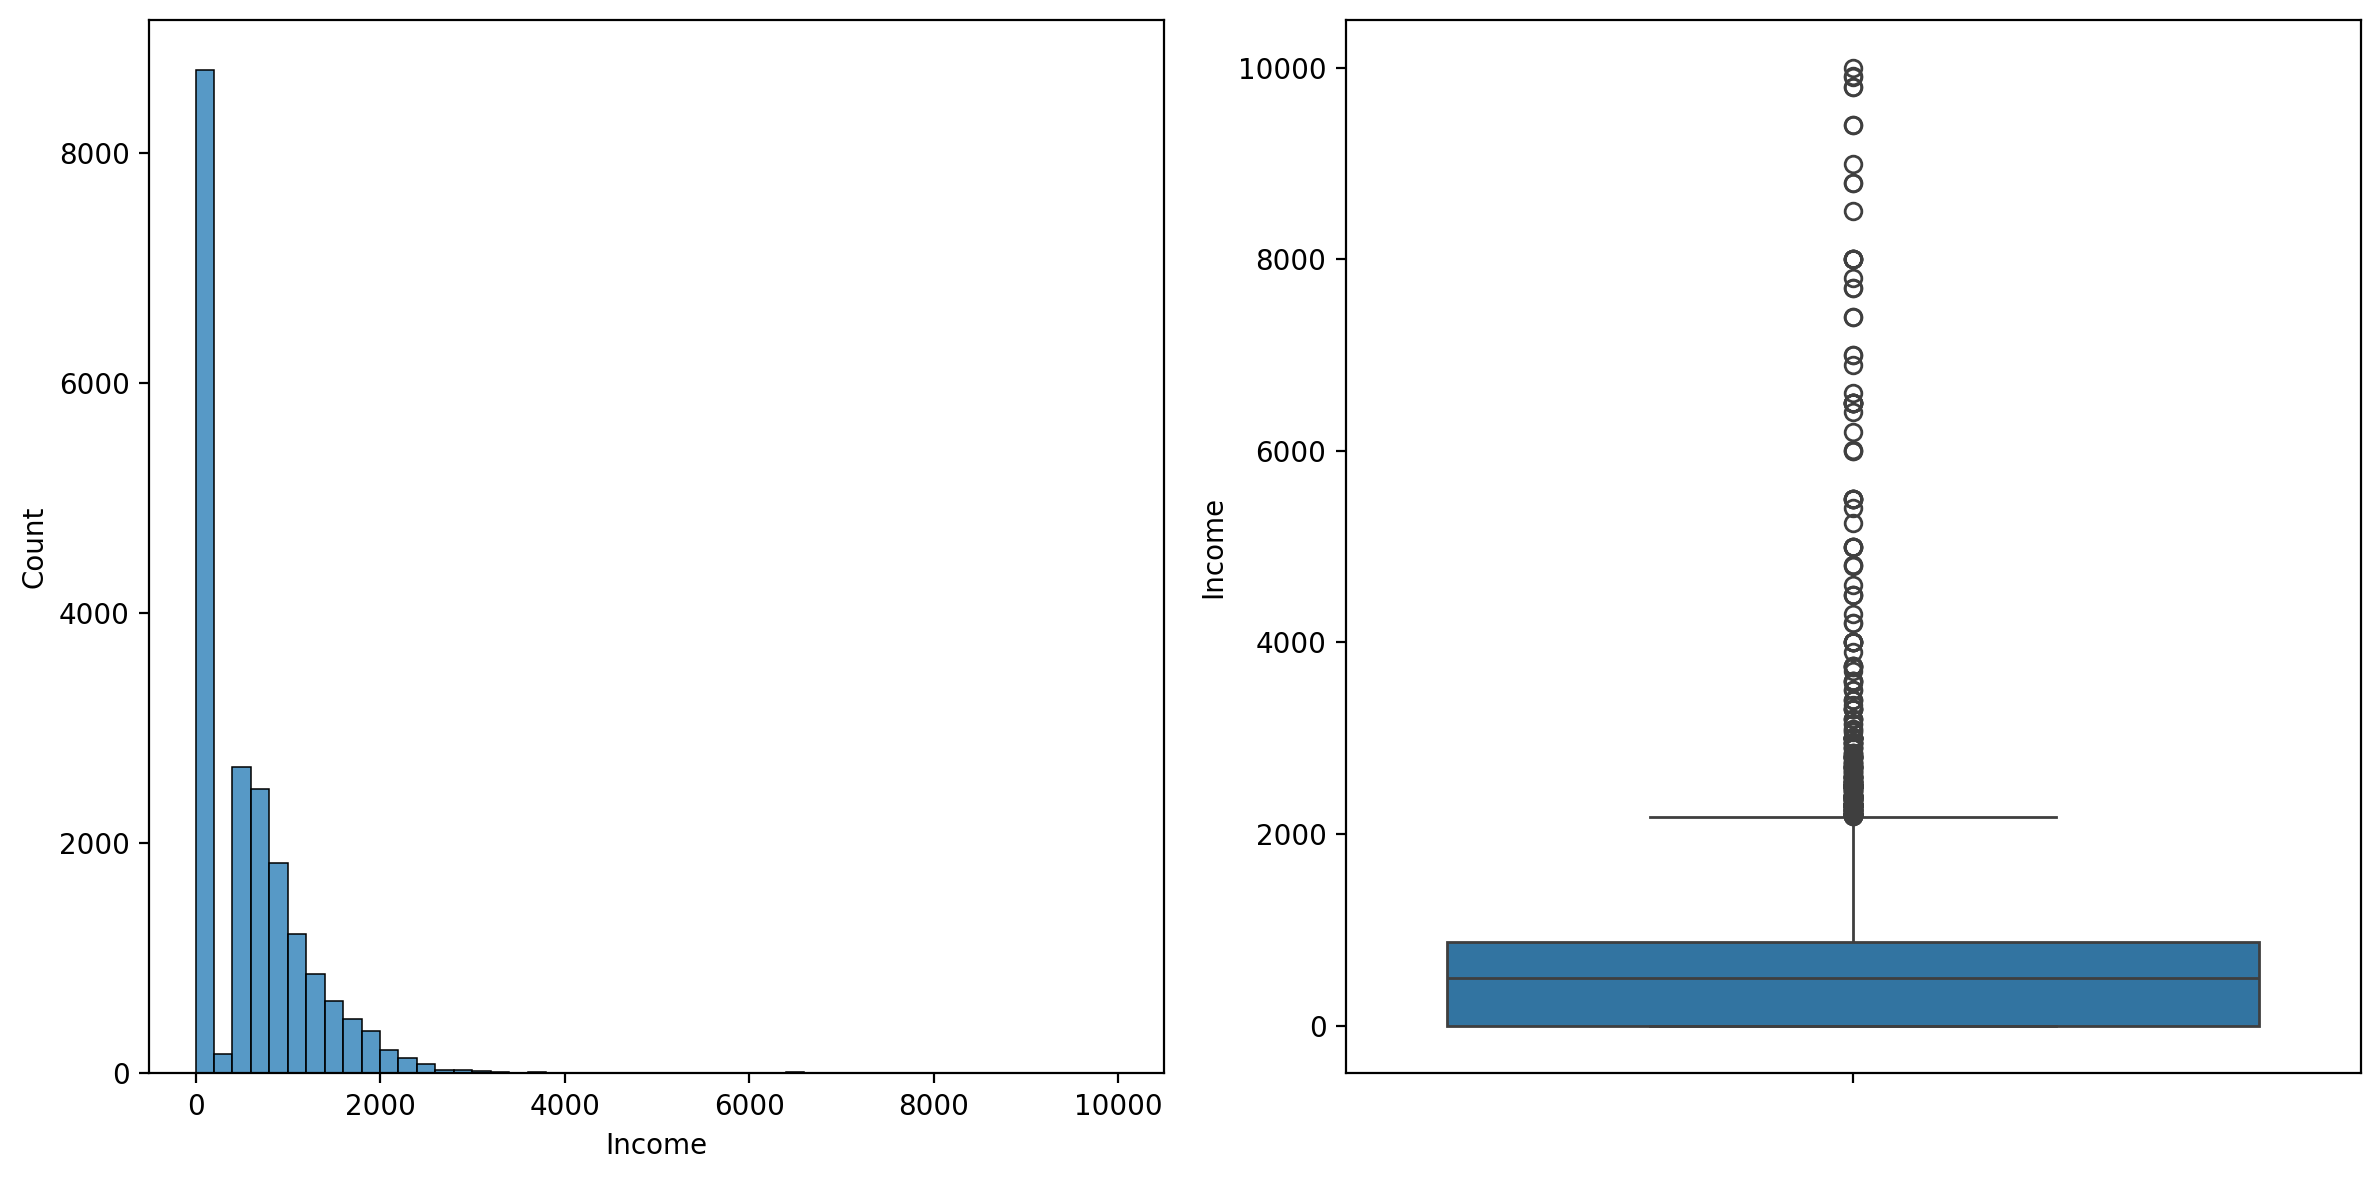

In [ ]:
col = train['Income']
f, ax = plt.subplots(1, 2, figsize = (12, 6))
sns.histplot(col, bins=50, ax=ax[0])
sns.boxplot(col, ax=ax[1])
plt.tight_layout()

왼쪽 그래프 (히스토그램): 대부분의 데이터가 낮은 소득 구간에 집중되어 있으며, 소득이 증가함에 따라 데이터의 수가 급격하게 감소하는 긴 꼬리를 보여준다. 이는 소득 분포가 우측으로 치우친(right-skewed) 분포를 가짐을 나타내며, 고소득자가 상대적으로 적다는 것을 의미한다.

오른쪽 그래프 (박스 플롯): 박스 플롯은 소득 데이터의 중앙값, 사분위 범위(Q1, Q3), 그리고 이상치를 나타낸다. 중앙값은 비교적 낮은 소득 구간에 위치해 있고, 상자의 길이는 IQR(Interquartile Range, Q3-Q1)을 나타내며, 데이터의 중앙 50% 범위를 의미한다. 데이터에는 많은 수의 이상치가 있으며, 이들은 주로 상위 소득 구간에 위치한다.

## 5. train_x, train_y, test_x Segregation

In [20]:
#train 데이터셋에서 'ID' 열과 'Income' 열을 제거
train_x = train.drop(columns=['ID', 'Income'])

#train 데이터셋에서 'Income' 열만을 선택하여 train_y라는 이름의 새로운 변수에 저장
train_y = train['Income']

#test 데이터프레임에서 'ID' 열을 제외
test_x = test.drop(columns=['ID'])

### -> train_x는 모델을 학습하는데 사용되는 입력 변수들이며, train_y는 각 입력에 대한 목표 값

## 6. Label Encoding

https://www.helloman.co.kr/65a55628-0cc2-4e18-b347-3dcd76956808

In [ ]:
# from sklearn.preprocessing import LabelEncoder

# encoding_target = list(train_x.dtypes[train_x.dtypes == "object"].index)

# for i in encoding_target:
#     le = LabelEncoder()

#     # train과 test 데이터셋에서 해당 열의 모든 값을 문자열로 변환
#     train_x[i] = train_x[i].astype(str)
#     test_x[i] = test_x[i].astype(str)

#     le.fit(train_x[i])
#     train_x[i] = le.transform(train_x[i])

#     # test 데이터의 새로운 카테고리에 대해 le.classes_ 배열에 추가
#     for case in np.unique(test_x[i]):
#         if case not in le.classes_:
#             le.classes_ = np.append(le.classes_, case)

#     test_x[i] = le.transform(test_x[i])

In [21]:
#train_x의 데이터를 DataFrame으로 다시 변환
train_x = pd.DataFrame(train_x, columns=train_x.columns)

#test_x를 DataFrame으로 다시 변환
test_x = pd.DataFrame(test_x, columns=test_x.columns)

# train_x DataFrame에서 데이터 타입이 'object'인 모든 열의 이름을 추출하여 리스트
encoding_target = list(train_x.dtypes[train_x.dtypes == "object"].index)

# Apply one-hot encoding
train_x = pd.get_dummies(train_x, columns=encoding_target)
test_x = pd.get_dummies(test_x, columns=encoding_target)

# align 메서드는 train_x와 test_x의 열을 정렬
train_x, test_x = train_x.align(test_x, join='left', axis=1)

# test_x에 새로 생긴 NaN 값들을 0
test_x.fillna(0, inplace=True)

### -> 전처리 과정 

In [ ]:
train_x.head()

,Age,Working_Week_Yearly,Gains,Losses,Dividends,Gender_F,Gender_M,Education_Status_Associates degree Academic,Education_Status_Associates degree Vocational,Education_Status_Bachelors degree,...,Birth_Country_Mother_Yugoslavia,Tax_Status_Head of Household HOH,Tax_Status_Married Filling Jointly both over 65 MFJ,Tax_Status_Married Filling Jointly both under 65 MFJ,Tax_Status_Married Filling Jointly one over 65 one under 65 MFJ,Tax_Status_Nonfiler,Tax_Status_Single,Income_Status_Over Median,Income_Status_Under Median,Income_Status_Unknown
0,63,4,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1
1,37,52,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,1,0,1,0
2,58,52,3411,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
3,44,52,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
4,37,52,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1


In [ ]:
train_y.head()

0    425
1      0
2    860
3    850
4    570
Name: Income, dtype: int64

In [ ]:
test_x.head()

,Age,Working_Week_Yearly,Gains,Losses,Dividends,Gender_F,Gender_M,Education_Status_Associates degree Academic,Education_Status_Associates degree Vocational,Education_Status_Bachelors degree,...,Birth_Country_Mother_Yugoslavia,Tax_Status_Head of Household HOH,Tax_Status_Married Filling Jointly both over 65 MFJ,Tax_Status_Married Filling Jointly both under 65 MFJ,Tax_Status_Married Filling Jointly one over 65 one under 65 MFJ,Tax_Status_Nonfiler,Tax_Status_Single,Income_Status_Over Median,Income_Status_Under Median,Income_Status_Unknown
0,79,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
1,47,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0
2,18,52,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
3,39,30,0,0,0,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
4,6,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1


## 7. Scaling Valiables

https://medium.com/@yashbaravaliya206/feature-scaling-and-normalization-ca484a16882a

In [22]:
from sklearn.preprocessing import StandardScaler

#StandardScaler 클래스의 인스턴스를 생성한다. 이 인스턴스를 사용하여 데이터를 표준화할 수 있다.
scaler = StandardScaler()

#fit 메소드를 사용해 훈련 데이터 train_x에 대해 평균과 표준편차를 계산
scaler.fit(train_x)

#transform 메소드를 사용하여 훈련 데이터 train_x를 표준화
train_x = scaler.transform(train_x)

#transform 메소드를 사용하여 훈련 데이터 test_x를 표준화
test_x = scaler.transform(test_x)

# from sklearn.preprocessing import RobustScaler
# scaler = RobustScaler()
# scaler.fit(train_x)
# train_x = scaler.transform(train_x)
# test_x = scaler.transform(test_x)

### ->  데이터의 스케일을 표준화

In [23]:
print(type(train_x))

<class 'numpy.ndarray'>


In [ ]:
train_x[:3]

array([[ 1.52092668e+00, -1.39044668e+00, -9.24508200e-02,
        -1.44003043e-01, -1.02286420e-01, -1.04836845e+00,
         1.04836845e+00, -1.77218291e-01, -1.96151773e-01,
        -3.29244111e-01, -3.52279320e-01, -4.83850001e-01,
        -6.60984506e-02, -8.69291382e-02, -1.26906535e-01,
        -1.68943901e-01, -2.06767666e-01, -1.10671601e-01,
        -2.03991216e-01, -6.93414261e-01, -5.66592700e-02,
        -1.60947439e-01,  5.95788137e+00, -7.47059195e-02,
        -1.12153734e+00, -1.74802703e-01,  1.42682259e+00,
        -2.54989091e-01, -7.08881205e-02, -8.92351218e-02,
        -7.80181088e-02, -6.21681573e-02, -1.16541833e-01,
        -7.07124460e-03, -2.10292266e-01, -9.92270048e-02,
        -2.08340289e-01, -2.34324474e-01, -1.18726296e-01,
        -1.94219372e-01, -3.60789717e-02, -2.06899099e-01,
        -2.92372506e-01, -2.55211433e-01, -2.09122899e-01,
        -7.33401422e-02, -5.53321877e-01, -1.56309694e-01,
        -1.48054679e-01, -7.93051586e-02, -1.81964871e-0

## 8. Split train_x, val_x, train_y, val_y

In [24]:
#train_test_split 함수를 호출하여 데이터셋을 훈련 세트와 검증 세트로 분할
from sklearn.model_selection import train_test_split

train_x, val_x, train_y, val_y = train_test_split(train_x, train_y, test_size=0.2, random_state=42)

## 9. Test with sklearn models

https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

In [26]:
pip install xgboost

You should consider upgrading via the 'c:\Users\82106\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [27]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

#여러 가지 회귀 모델을 딕셔너리에 저장
models = {LinearRegression(): 'LinearRegression',
          SGDRegressor(): 'SGDRegressor',
          # LogisticRegression(max_iter=10000): 'LogisticRegression',
          RandomForestRegressor(): 'RandomForestRegressor',
          SVR(): 'SVR',
          XGBRegressor(): 'XGBRegressor'}

#딕셔너리에 저장된 모델들을 순회하는 for 루프를 시작
for model in models.keys():
    model.fit(train_x, train_y)
    pred = model.predict(val_x)
    mse = mean_squared_error(val_y, pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(val_y, pred)
    print(f'{models[model]}: RMSE {rmse}, R^2 {r2}')

LinearRegression: RMSE 3750357546903697.5, R^2 -2.856892594418587e+25
SGDRegressor: RMSE 61166053667.51373, R^2 -7599228235290852.0
RandomForestRegressor: RMSE 626.7195643209603, R^2 0.20219809311140458
SVR: RMSE 657.024076491372, R^2 0.12317861300184518
XGBRegressor: RMSE 620.6915860225803, R^2 0.21747128708153107


### -> 모델마다 다른 훈련과 평가 과정을 자동화하여, 각 모델의 성능을 빠르게 비교

In [ ]:
print(model)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)


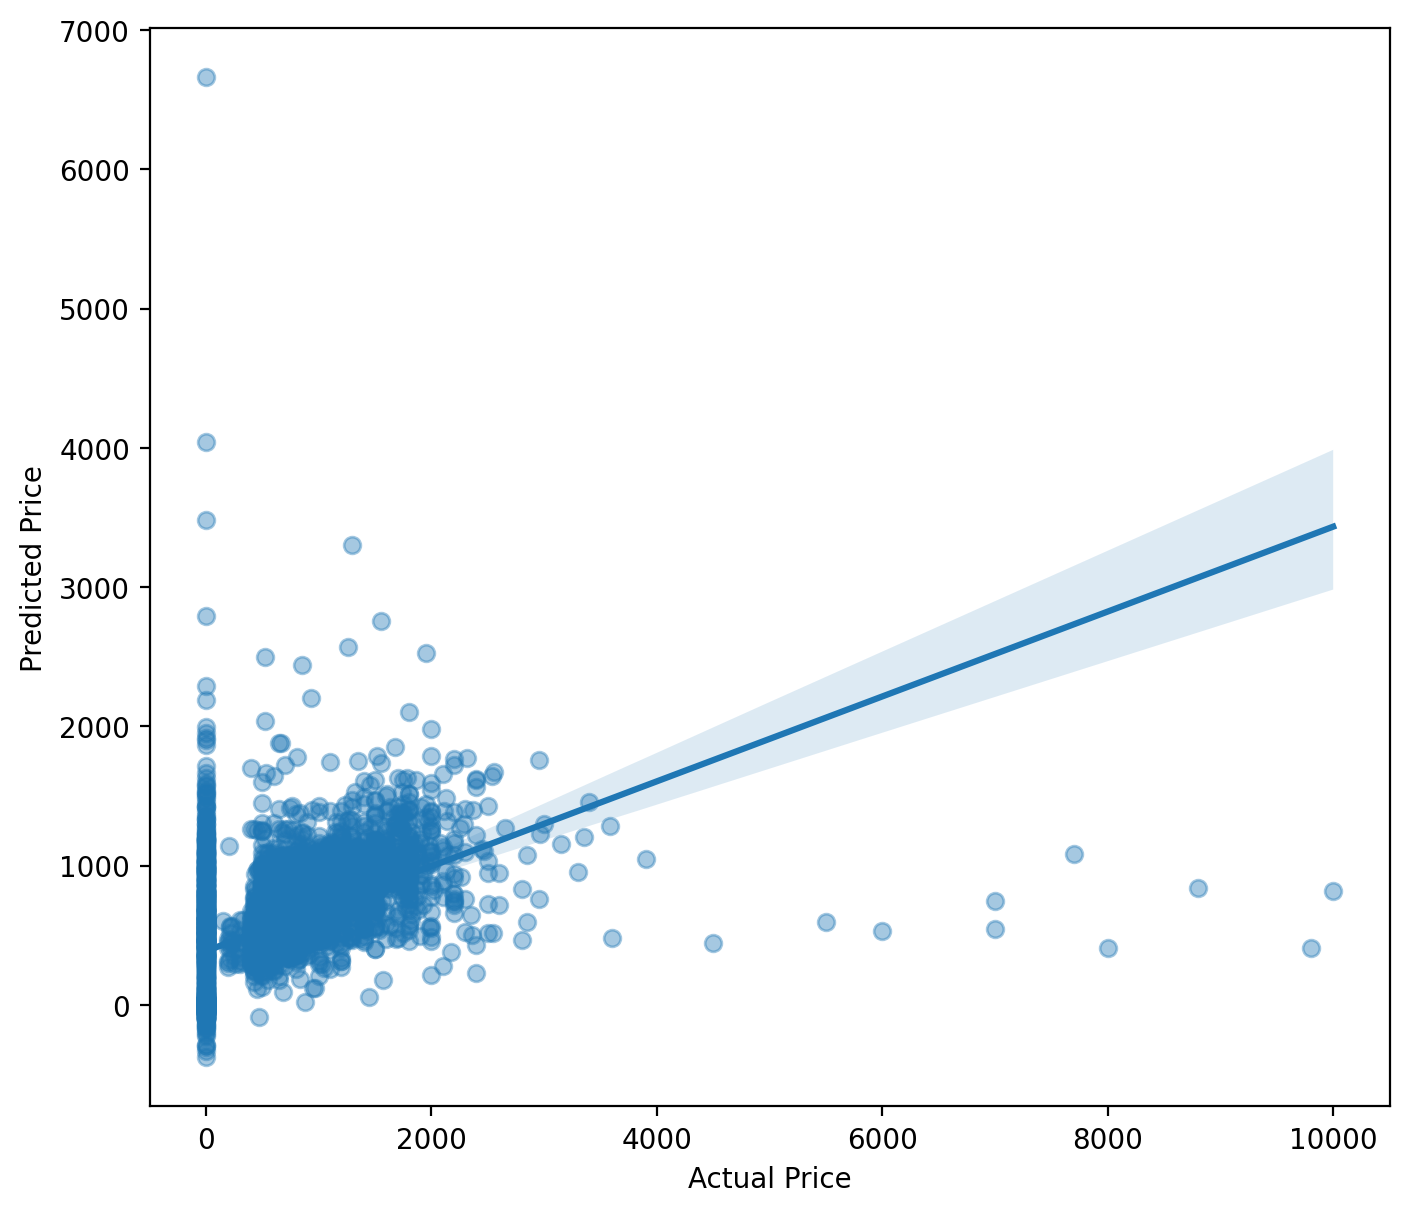

In [28]:
pred_y = model.predict(val_x)
plt.figure(figsize=(8, 7))
sns.regplot(x = val_y, y = pred_y, scatter_kws={'alpha':0.4})
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.show()

### -> 평가 시각화

축 라벨: x축은 'Actual Price'로, 실제 가격을 나타내고, y축은 'Predicted Price'로, 모델에 의해 예측된 가격을 나타낸다.

데이터 분포: 대부분의 데이터 포인트가 좌측 하단에 밀집되어 있어, 낮은 가격 범위에서의 많은 예측이 이루어진 것을 알 수 있다.

회귀선: 파란색 선은 예측된 가격과 실제 가격 사이의 관계를 나타내는 회귀선이다. 이 선 주변의 옅은 파란색 영역은 회귀선의 신뢰 구간을 나타낼 수 있다.

예측 정확도: 이상적인 예측은 대각선(45도 선)을 따라 배치되어야 하며, 이 그래프에서 회귀선은 대각선보다 더 가파르게 보인다. 이는 모델이 낮은 가격을 과소평가하고 높은 가격을 과대평가하는 경향이 있음을 의미할 수 있다.
이상치: y축의 값이 0에 가까운 일부 포인트들이 관측되며, 이는 잘못된 예측 또는 데이터의 이상치일 수 있다.

성능 평가: 데이터 포인트들이 회귀선 주변에 더 밀집되어 있으면 모델의 예측 성능이 좋다고 할 수 있다. 하지만 이 그래프에서는 실제 가격이 증가함에 따라 예측값의 분산이 증가하는 경향을 보여준다.

# 10. DNN Model Design
https://www.researchgate.net/figure/A-DNN-architecture-This-is-a-simple-example-of-how-a-DNN-may-be-built-Here-the-initial_fig1_348688002


In [38]:
from tensorflow.keras import models, layers
from tensorflow.keras import callbacks
import keras

#Sequential 모델 인스턴스를 생성
model = models.Sequential()

#모델에 입력 층을 추가합니다. 입력 데이터의 형태(shape)는 275개의 특성을 가진 1차원 텐서
model.add(layers.Input(shape=(275,)))

#여러 개의 Dense 층을 추가
#각 층은 일정 수의 뉴런(예: 128*4, 128*3 등)을 가지며, l2 정규화를 적용하여 가중치 감소(weight decay)를 통해 과적합을 방지
model.add(layers.Dense(128*4, kernel_regularizer=keras.regularizers.l2(0.001)))

#각 Dense 층 다음에 배치 정규화 층을 추가하여 각 층의 출력을 정규화
model.add(layers.BatchNormalization())

#활성화 함수로 LeakyReLU를 사용
#이는 전통적인 ReLU 함수의 변형으로, 음수 입력에 대해 작은 기울기를 허용하여 뉴런이 활성화를 유지
model.add(layers.LeakyReLU())

#Dropout을 적용하여 뉴런의 30%를 무작위로 비활성화
#이는 모델이 특정 뉴런에 과도하게 의존하는 것을 방지하여 과적합을 줄인다
model.add(layers.Dropout(0.3))

model.add(layers.Dense(128*3, kernel_regularizer=keras.regularizers.l2(0.001)))
model.add(layers.BatchNormalization())
# model.add(layers.Activation('relu'))
model.add(layers.LeakyReLU())
model.add(layers.Dropout(0.3))

model.add(layers.Dense(128*2, kernel_regularizer=keras.regularizers.l2(0.001)))
model.add(layers.BatchNormalization())
# model.add(layers.Activation('relu'))
model.add(layers.LeakyReLU())
model.add(layers.Dropout(0.3))

model.add(layers.Dense(128, kernel_regularizer=keras.regularizers.l2(0.001)))
model.add(layers.BatchNormalization())
# model.add(layers.Activation('relu'))
model.add(layers.LeakyReLU())
model.add(layers.Dropout(0.3))

model.add(layers.Dense(128, kernel_regularizer=keras.regularizers.l2(0.001)))
model.add(layers.BatchNormalization())
# model.add(layers.Activation('relu'))
model.add(layers.LeakyReLU())
model.add(layers.Dropout(0.3))

model.add(layers.Dense(128, kernel_regularizer=keras.regularizers.l2(0.001)))
model.add(layers.BatchNormalization())
# model.add(layers.Activation('sigmoid'))
model.add(layers.LeakyReLU())
model.add(layers.Dropout(0.3))

#최종 출력을 위한 Dense 층을 추가
#이 층은 하나의 뉴런을 가지며, 회귀 문제의 경우 실수 값을, 이진 분류 문제의 경우 확률을 출력
model.add(layers.Dense(1))
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                 │ (None, 512)            │       141,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_6 (LeakyReLU)       │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 384)            │       196,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 384)            │         1,536 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_7 (LeakyReLU)       │ (None, 384)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 384)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 256)            │        98,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_8 (LeakyReLU)       │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_9 (LeakyReLU)       │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_10 (LeakyReLU)      │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │             

 Total params: 509,057 (1.94 MB)

 Trainable params: 505,985 (1.93 MB)

 Non-trainable params: 3,072 (12.00 KB)

### -> 이 모델은 여러 Dense 층과 배치 정규화, LeakyReLU 활성화 함수, Dropout을 사용하는 복잡한 신경망 구조

In [39]:
from keras.utils import plot_model
plot_model(model, show_shapes=True)

You must install graphviz (see instructions at https://graphviz.gitlab.io/download/) for `plot_model` to work.


## 11. Complie Model and Training

In [40]:
from keras.optimizers import SGD, Adam, RMSprop
from keras import backend as K

# 학습률을 0.001로 정의. 학습률은 옵티마이저가 가중치를 업데이트할 때 적용하는 스텝의 크기를 결정
learning_rate = 0.001

# RMSprop 옵티마이저를 정의하고, 앞서 설정한 학습률을 사용
optimizer = RMSprop(learning_rate=learning_rate)

#사용자 정의 손실 함수인 root_mean_squared_error를 정의
def root_mean_squared_error(y_true, y_pred):

    #실제 값과 예측 값을 Keras의 기본 부동소수점 타입(K.floatx())으로 캐스팅
    y_true = K.cast(y_true, K.floatx())

    #실제 값과 예측 값의 차이의 제곱에 대한 평균을 구하고, 그 값의 제곱근을 반환
    y_pred = K.cast(y_pred, K.floatx())
    return K.sqrt(K.mean(K.square(y_pred - y_true)))

# 모델을 컴파일. 여기서는 손실 함수로 앞서 정의한 root_mean_squared_error를, 옵티마이저로는 앞서 정의한 optimizer를 사용
model.compile(loss=root_mean_squared_error,
              optimizer=optimizer,
              metrics=['mae'])

#### -> 컴파일 옵션은 모델의 학습 과정에서 가중치를 어떻게 조정할 것인지, 학습 시 어떤 손실 함수를 최소화할 것인지, 그리고 성능을 어떤 메트릭으로 평가할 것인지를 결정

In [41]:
from keras.callbacks import LearningRateScheduler
import tensorflow.keras.backend as K
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# epoch마다 학습률을 조정하는 함수를 정의
def lr_schedule(epoch):

    #학습을 시작할 때의 초기 학습률을 0.01로 설정
    initial_lr = 0.01

    #학습률을 감소시킬 비율을 0.5로 설정
    drop_rate = 0.5

    #몇 에폭마다 학습률을 감소시킬지를 결정
    epochs_drop = 5.0

    #에폭마다 계산된 학습률을 반환
    return initial_lr * (drop_rate ** (epoch // epochs_drop))

#LearningRateScheduler 콜백을 사용하여 lr_schedule 함수를 모델 학습에 적용
lr_scheduler_cb = LearningRateScheduler(lr_schedule)

#ModelCheckpoint 콜백을 사용하여 모델의 가중치를 지정된 경로에 저장
check_point_cb = callbacks.ModelCheckpoint('/content/gdrive/My Drive/Dacon/dacon_model10_1.keras',
                                           save_best_only=True)

#EarlyStopping 콜백을 사용하여, 검증 손실이 개선되지 않을 때 조기에 학습을 중단
early_stopping_cb = callbacks.EarlyStopping(patience=10,
                                            monitor='val_loss',
                                            restore_best_weights=True)

#fit 메서드를 사용하여 모델을 학습
history = model.fit(train_x, train_y,
                     epochs=100,
                     validation_data=(val_x, val_y),
                     verbose=1,
                     callbacks=[check_point_cb, early_stopping_cb, lr_scheduler_cb])

Epoch 1/100


500/500 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 710.3654 - mae: 470.7176 - val_loss: 576.7335 - val_mae: 383.0242 - learning_rate: 0.0100
Epoch 2/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 557.1300 - mae: 349.1447 - val_loss: 547.6698 - val_mae: 331.0430 - learning_rate: 0.0100
Epoch 3/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 558.1736 - mae: 348.6192 - val_loss: 546.9553 - val_mae: 331.6337 - learning_rate: 0.0100
Epoch 4/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 554.0812 - mae: 346.0469 - val_loss: 544.6417 - val_mae: 329.2211 - learning_rate: 0.0100
Epoch 5/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 552.6403 - mae: 344.7834 - val_loss: 542.7081 - val_mae: 332.8912 - learning_rate: 0.0100
Epoch 6/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - loss: 548.7133 - mae: 340.8979 - val_loss: 539.8944 - val_mae: 334.1980 - learning_rate: 0.0050
Epoch 7/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 543.8554 - mae: 337.5591 - val_loss: 539.2393

### -> 학습률 스케줄링, 모델 체크포인트 저장, 조기 종료를 위한 콜백(callbacks)을 정의하고 모델 학습을 시작하는 과정

In [42]:
print(history.history.keys())


dict_keys(['loss', 'mae', 'val_loss', 'val_mae', 'learning_rate'])


## 12. Evaluation

In [46]:

def show_history_r(history):
    history_dict = history.history

    loss = history_dict['loss']
    val_loss = history_dict['val_loss']

    epochs = range(1, len(loss) + 1)
    fig = plt.figure(figsize=(12, 5))

    ax1 = fig.add_subplot(1, 2, 1)
    ax1.plot(epochs, loss, 'b-', label='train_loss')
    ax1.plot(epochs, val_loss, 'r-', label='val_loss')
    ax1.set_title('Train and Validation Loss')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Loss')
    ax1.grid()
    ax1.legend()

    accuracy = history_dict['mae']
    val_accuracy = history_dict['val_mae']

    ax2 = fig.add_subplot(1, 2, 2)
    ax2.plot(epochs, accuracy, 'b-', label='train_mae')
    ax2.plot(epochs, val_accuracy, 'r-', label='val_mae')
    ax2.set_title('Train and Validation MAE')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('MAE')
    ax2.grid()
    ax2.legend()

    plt.show()

### ->  matplotlib 라이브러리를 이용하여 학습의 이력을 그래프로 시각화

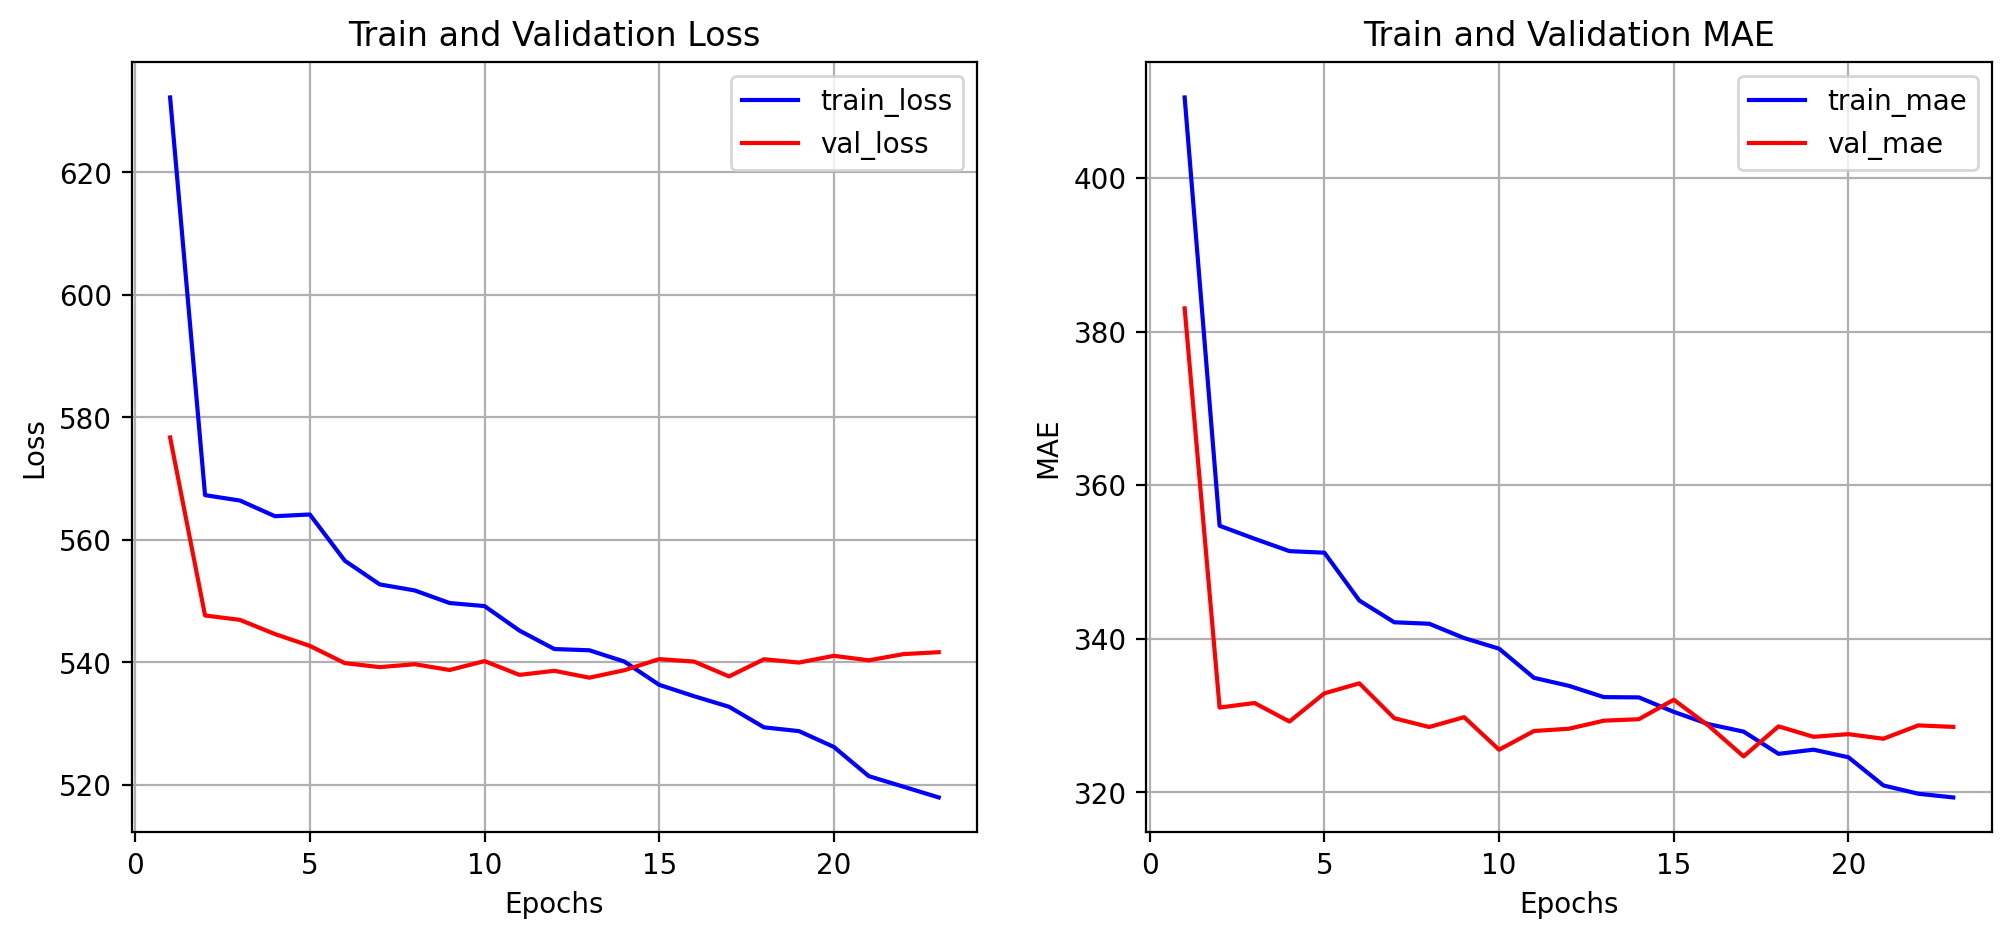

In [47]:
show_history_r(history)

손실(Loss) 그래프(왼쪽):

파란색 선(훈련 손실)과 빨간색 선(검증 손실) 모두 초기에 급격히 감소한다. 이는 모델이 초기에 빠르게 학습하고 있음을 나타낸다.

에폭이 진행됨에 따라 두 손실이 점차 안정화되는 경향을 보이며, 모델이 최적화되어 가고 있음을 시사한다.

훈련 손실과 검증 손실 사이의 간격이 비교적 좁게 유지되고 있으므로, 큰 과적합의 신호는 보이지 않는다.

MAE 그래프(오른쪽):

MAE 그래프 또한 손실 그래프와 유사한 경향을 보이며, 빠른 초기 학습 이후 점차 안정화된다.

훈련 MAE(파란색 선)가 검증 MAE(빨간색 선)보다 전반적으로 낮으며, 이는 모델이 훈련 데이터에 대해 약간 더 정확한 예측을 하고 있음을 나타낸다.

검증 MAE도 감소 추세를 보이지만, 일정 에폭 이후로는 크게 개선되지 않는 것으로 보여진다. 이는 모델이 이미 주어진 데이터에서 배울 수 있는 것에 대부분 도달했을 수 있음을 나타낸다.

https://velog.io/@hyesoup/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D-%ED%9A%8C%EA%B7%80-%EB%AA%A8%EB%8D%B8%EC%9D%98-%EC%84%B1%EB%8A%A5-%ED%8F%89%EA%B0%80-%EC%A7%80%ED%91%9C-MAE-MSE-RMSE-R-squred

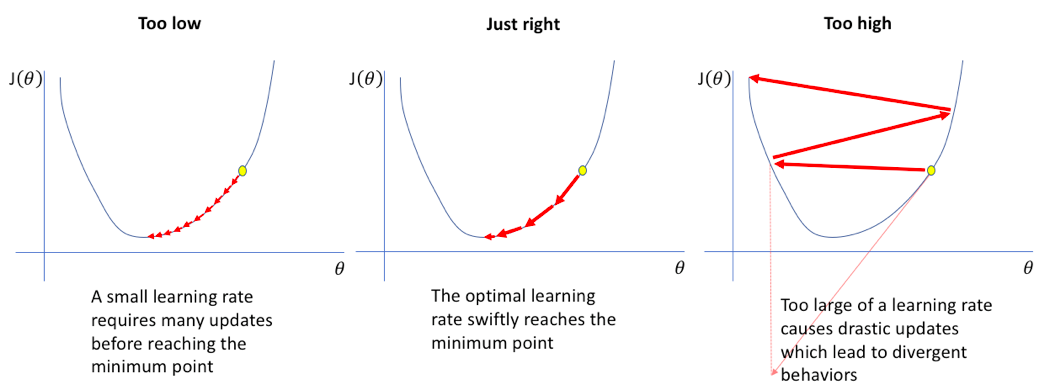

  1/125 ━━━━━━━━━━━━━━━━━━━━ 18s 153ms/step

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


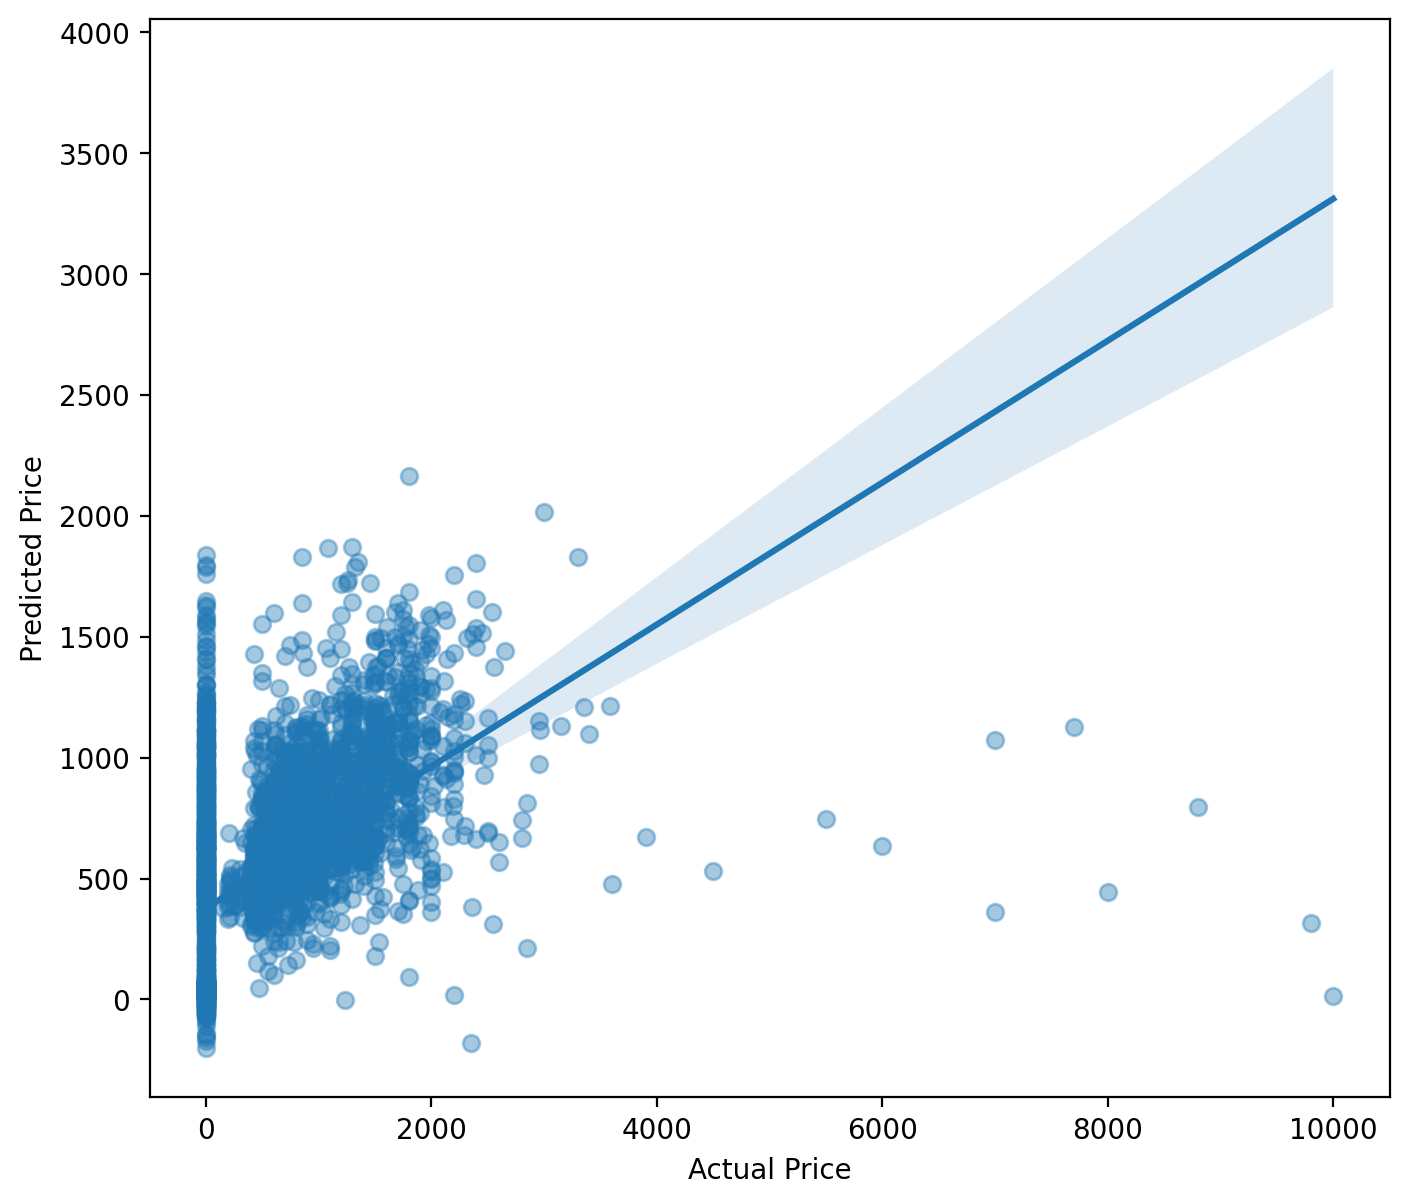

In [45]:
#예측값을 시각화
pred_y = model.predict(val_x)
plt.figure(figsize=(8, 7))
sns.regplot(x = val_y, y = pred_y, scatter_kws={'alpha':0.4})
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.show()

### -> 예측값 시각화

데이터 집중: 대부분의 데이터 포인트가 $2000 이하의 실제 가격 범위에 밀집되어 있다.

예측 정확도: 낮은 가격대에서 모델의 예측은 실제 가격에 비교적 잘 맞춰져 있는 것 같지만, 실제 가격이 증가함에 따라 예측값의 정확도가 다소 떨어지는 것으로 보인다.

데이터 분포: 가격이 높아질수록 실제 가격에 대한 예측값의 분산이 커지는 경향이 있으며, 특히 실제 가격이 매우 높은 쪽에서는 예측값이 상대적으로 적은 수치를 보인다.

회귀선 및 신뢰 구간: 파란색 선은 모델의 예측을 나타내는 회귀선으로, 실제 가격과 예측 가격 간의 관계를 보여준다. 주변의 옅은 파란색 영역은 이 회귀선의 신뢰 구간을 나타낸다.

 34/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


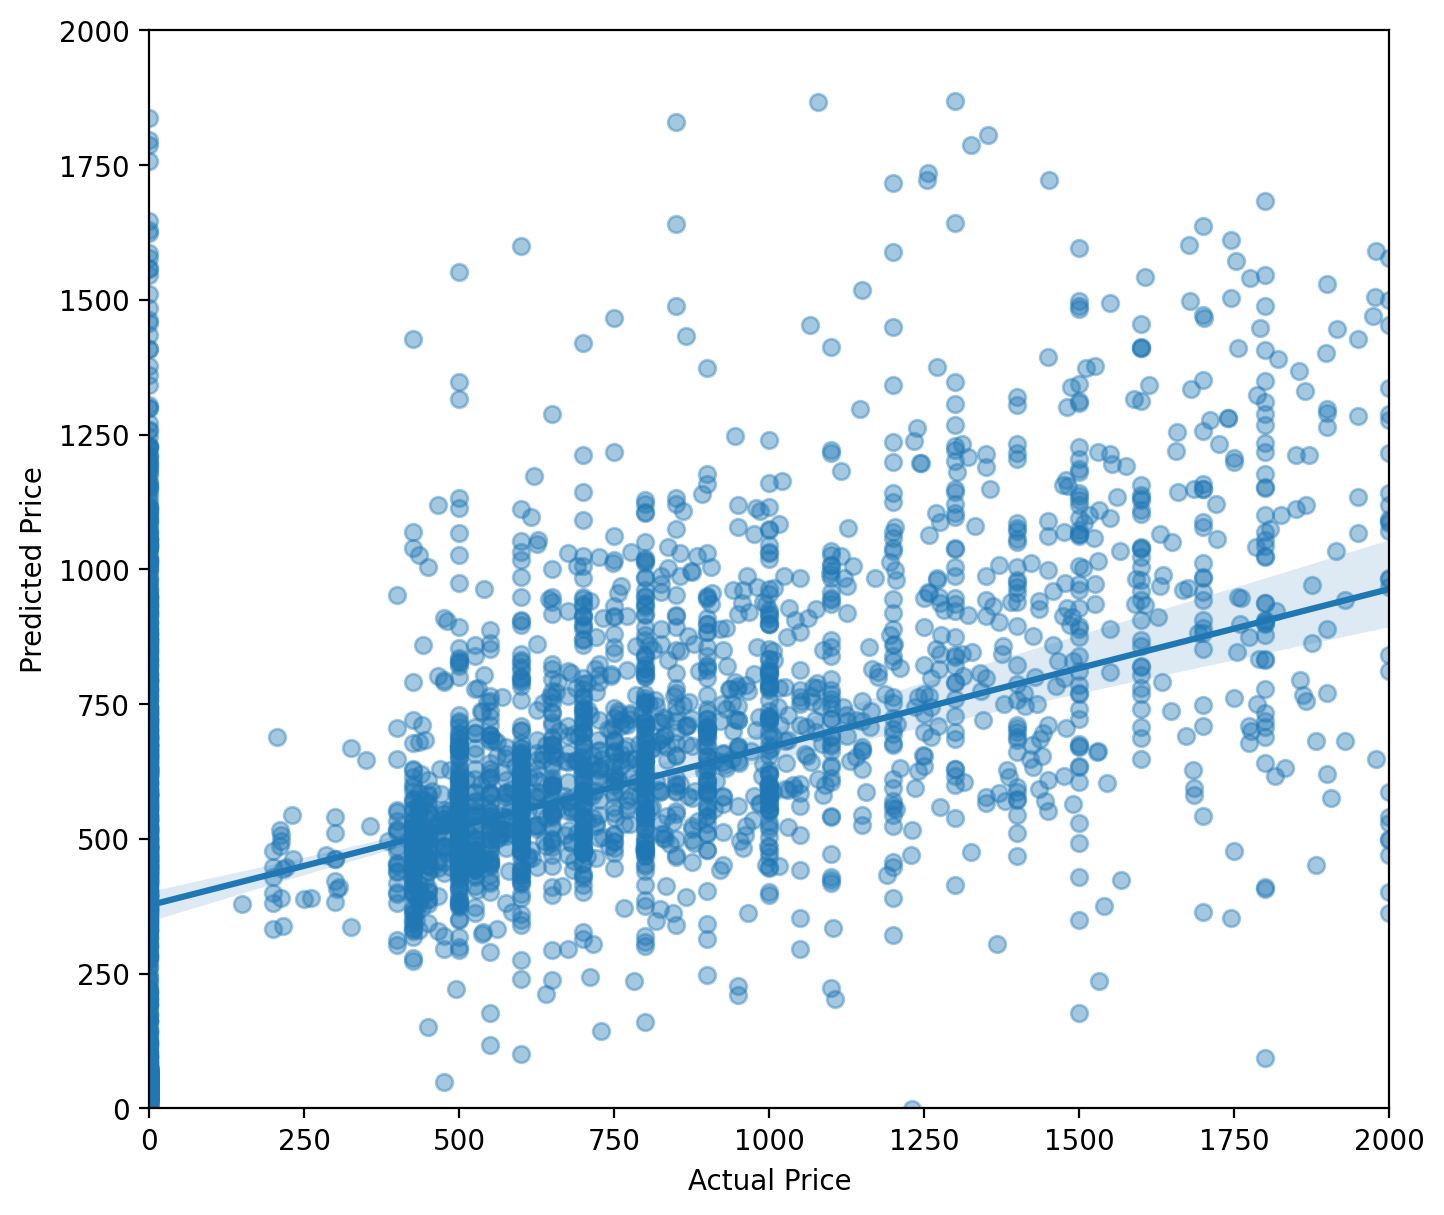

In [48]:
# Make predictions
pred_y = model.predict(val_x)

# Set the figure size
plt.figure(figsize=(8, 7))

# Plot the data points
sns.regplot(x=val_y, y=pred_y, scatter_kws={'alpha': 0.4})

# Set the x and y axis limits
plt.xlim((0, 2000))
plt.ylim((0, 2000))

# Set the x and y axis labels
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')

# Show the plot
plt.show()

데이터 포인트들은 일반적으로 실제 가격과 예측 가격 사이에 양의 상관관계를 보인다. 즉, 실제 가격이 증가함에 따라 예측 가격도 증가하는 경향이 있다.

회귀선은 데이터 포인트들의 중심을 관통하며, 실제 가격에 대한 예측 가격의 평균 경향을 나타낸다.

많은 데이터 포인트들이 회귀선 주변에 분포하고 있으나, 회귀선에서 멀리 떨어진 포인트들도 관찰된다. 이는 모델이 모든 케이스에 대해 일관되게 잘 예측하지 못할 수 있음을 의미한다.

실제 가격이 매우 낮거나 매우 높은 구간에서 데이터 포인트들이 회귀선을 벗어나는 경향이 보이며, 이는 이상치일 수 있다.

모델의 예측 성능을 개선하기 위해서는 모델의 복잡도를 증가시키거나, 더 많은 데이터를 수집하거나, 특성을 추가하는 등의 방법을 고려할 필요가 있다.

## 13. Prediction

In [49]:
preds = model.predict(test_x)

 32/313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step  

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


## 14. Generating Prediction Dataset

In [51]:
submission = pd.read_csv('C:/Users/82106/Desktop/데이터분석 프로젝트/소득예측/open/open/sample_submission.csv')
submission['Income'] = preds
submission

,ID,Income
0,TEST_0000,52.347816
1,TEST_0001,14.170956
2,TEST_0002,419.811981
3,TEST_0003,557.286072
4,TEST_0004,43.188122
...,...,...
9995,TEST_9995,1009.471008
9996,TEST_9996,703.008240
9997,TEST_9997,407.022858
9998,TEST_9998,45.028244


## 15. Save Submission CSV file

In [52]:
submission.to_csv('/content/gdrive/My Drive/Dacon/dacon_submission10_1.csv', index=False)